# Liberias

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# EDA

In [38]:
data = pd.read_csv(r'..\data\raw\diabetes_data_upload.csv')
print(data.shape)
data.head()

(520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## target

la variable target sera si tiene diabetes o no, esta almacenada en la variable class

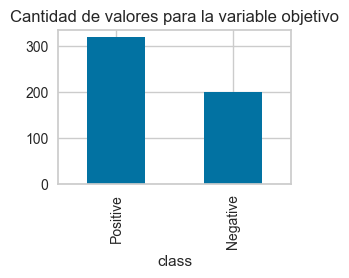

class
Positive    320
Negative    200
Name: count, dtype: int64


In [40]:
target = data['class']
ax = target.value_counts().plot(kind='bar', figsize=(3, 2))
ax.set_title('Cantidad de valores para la variable objetivo')
plt.show()
print(target.value_counts())

## Tipos de variables

se cambiara la palabra yes por 1 y la palabra no por 0

In [41]:
numerical_columns = data.select_dtypes(include=['number']).columns
print("Columnas numéricas:", numerical_columns)

Columnas numéricas: Index(['Age'], dtype='object')


In [42]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", categorical_columns)

Columnas categóricas: Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


## valores nulos

In [43]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

## variables discretas

In [44]:
v_cat = [var for var in data.columns if data[var].dtype == 'object']
v_cat

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [45]:
import pandas as pd

# Crear un diccionario para almacenar los resultados de value_counts
value_counts_dict = {}
for var in v_cat:
    value_counts_dict[var] = data[var].value_counts()
# Convertir el diccionario a un DataFrame
value_counts_df = pd.DataFrame(value_counts_dict)
# Mostrar el DataFrame
value_counts_df


,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Female,192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0
No,NaN,262.0,287.0,303.0,215.0,283.0,404.0,287.0,267.0,394.0,281.0,296.0,325.0,341.0,432.0,NaN
Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.0
Yes,NaN,258.0,233.0,217.0,305.0,237.0,116.0,233.0,253.0,126.0,239.0,224.0,195.0,179.0,88.0,NaN


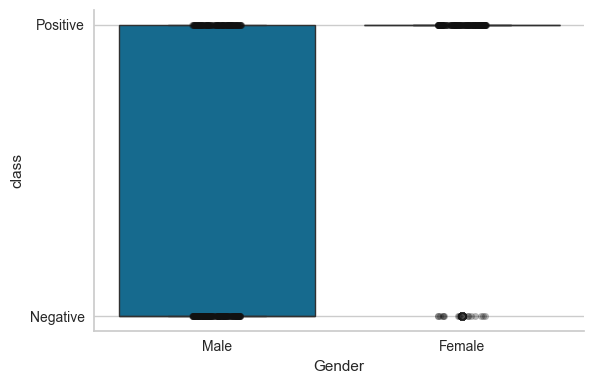

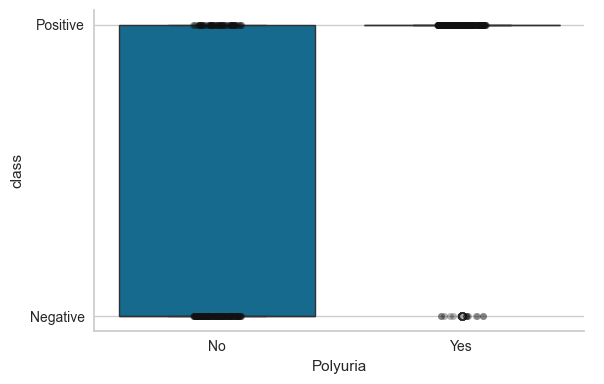

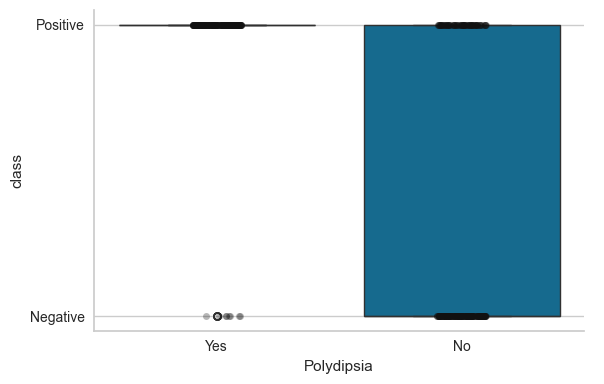

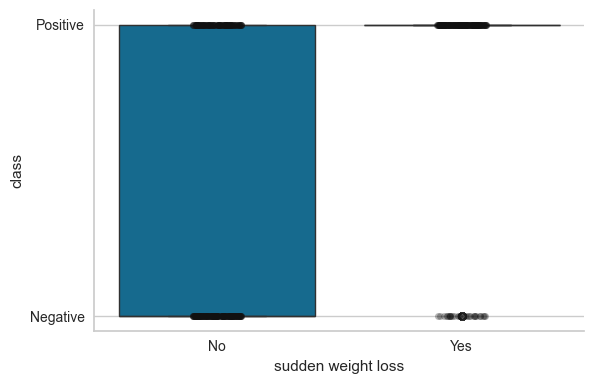

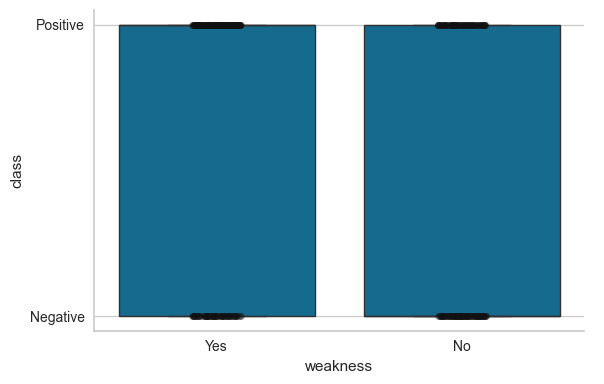

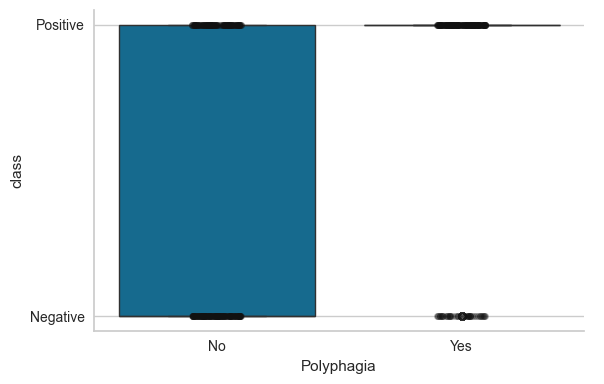

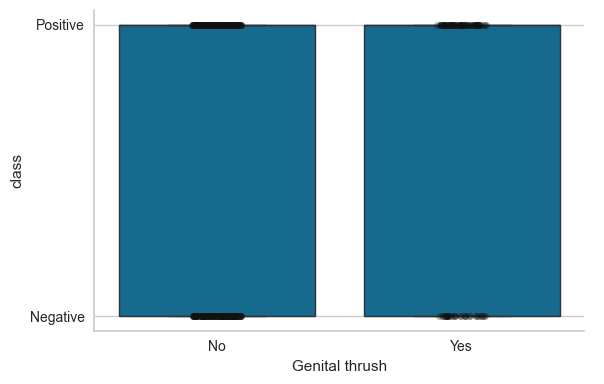

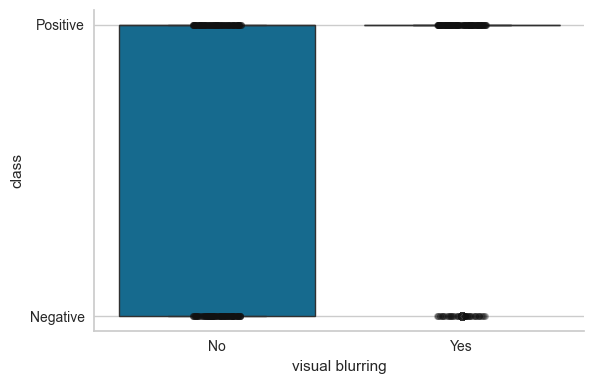

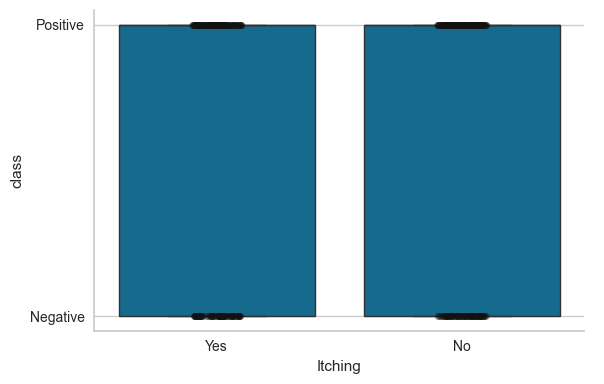

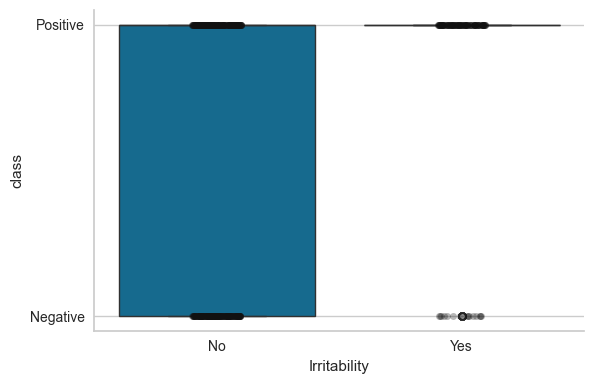

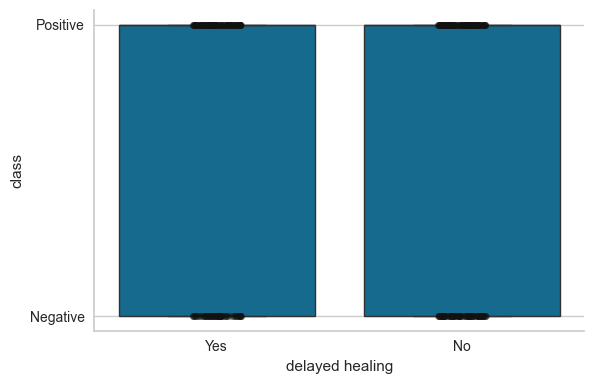

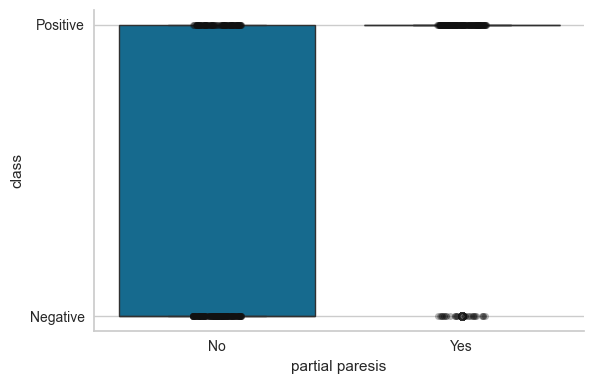

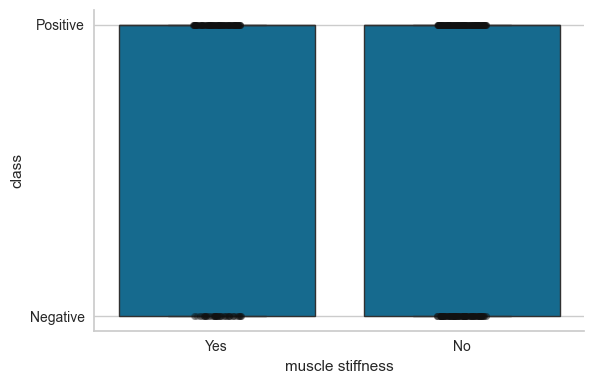

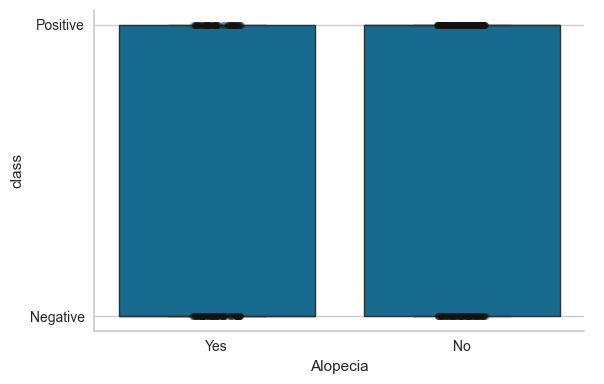

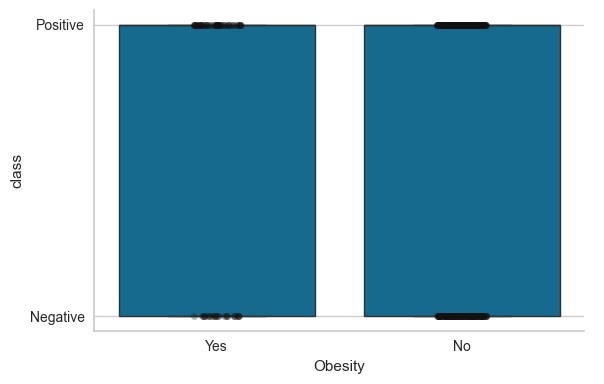

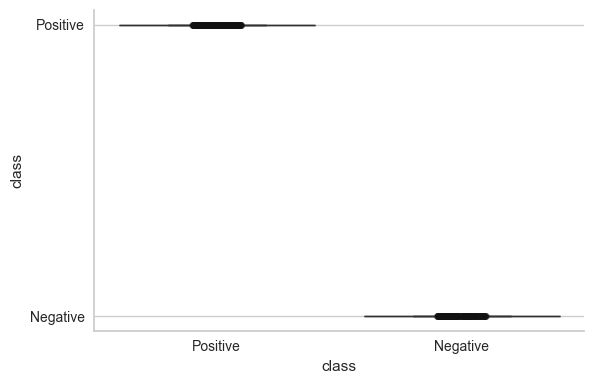

In [46]:
for var in v_cat:
    # make boxplot with Catplot
    sns.catplot(x=var, y=target, data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y=target, data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

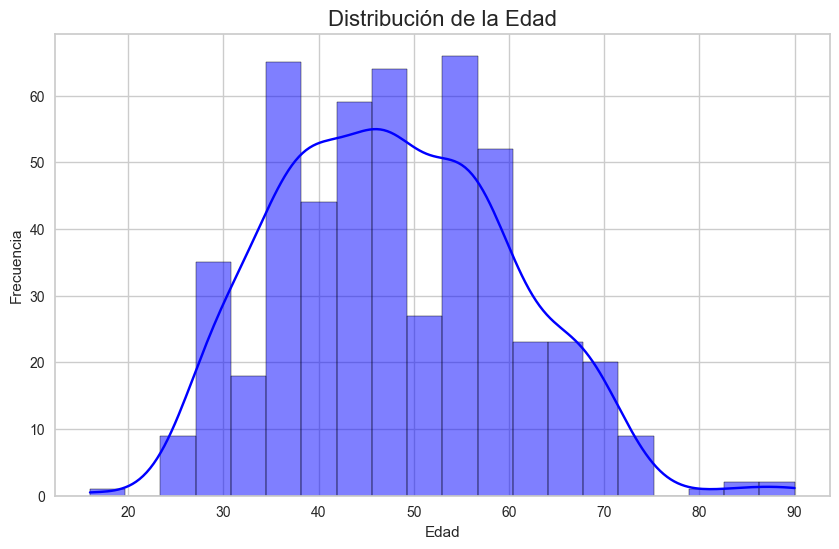

In [47]:
# Configurar el tamaño de las gráficas
plt.figure(figsize=(10, 6))

# Graficar la distribución de la variable "Age"
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Edad', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


# 2. preprocesamiento y feature engineering inicial

In [48]:
# Crear una copia del dataframe original
df_processed = data.copy()

# Inicializar el LabelEncoder
le = LabelEncoder()

# Crear una copia del dataframe original
df_processed = data.copy()

for column in df_processed.columns:
    if df_processed[column].dtype == 'object':
        df_processed[column] = le.fit_transform(df_processed[column])

scaler = MinMaxScaler(feature_range=(0,1))

# Ajustar el escalador a los datos y transformarlos

# ponme todo eso en un pipeline. puedes usar la libreria feature-engine 
df_processed['Age'] = scaler.fit_transform(df_processed[['Age']])
df_processed.rename(columns={'class':'diabetes'},inplace=True)
df_processed.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,diabetes
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# division de los datos en entrenamiento y test

In [49]:

# Definir las características (X) y la variable objetivo (y)
X = df_processed.drop('diabetes', axis=1)
y = df_processed['diabetes']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((468, 16), (52, 16), (468,), (52,))

In [50]:
import pandas as pd

# Asumiendo que ya tienes definidos X_train, X_test, y_train, y y_test

# Exportar X_train
pd.DataFrame(X_train).to_csv(r'..\data\processed\X_train.csv', index=False)

# Exportar X_test
pd.DataFrame(X_test).to_csv(r'..\data\processed\X_test.csv', index=False)

# Exportar y_train
pd.DataFrame(y_train).to_csv(r'..\data\processed\y_train.csv', index=False)

# Exportar y_test
pd.DataFrame(y_test).to_csv(r'..\data\processed\y_test.csv', index=False)

print("Archivos CSV exportados correctamente.")

Archivos CSV exportados correctamente.
